# Particle Swarm Optimization

In [10]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
import numpy as np
from matplotlib.animation import PillowWriter

#### First lets define each particle as object

In [196]:
class particle:
    pos = None
    v = None
    fitness = None
    pos_best = None
    fit_best = None
    def __init__(self,pos,v):
        self.pos = np.array(pos)
        self.v = np.array(v)
        self.fitness = self.fit()
        self.fit_best = self.fitness
        self.pos_best = self.pos
        
    def fit(self):
        x,y = self.pos
        temp = mp.absmax(1-(mp.sqrt(x**2+y**2)/mp.pi))
        return mp.absmax(mp.sin(x)*mp.cos(y)*mp.exp(temp))
    
    def move(self):
        global globBestFit,globBestPos

        inersi = w*(self.v%10)
        personal_best = c1*np.random.rand()*(self.pos_best-self.pos)
        global_best = c2*np.random.rand()*(globBestPos-self.pos)
        
        v2 = inersi+personal_best+global_best
        self.pos = self.pos+v2
        self.v = v2
        
        x,y = self.pos
        if(x<-10):x=10-abs(-10-x)%20
        if(x>10):x=-10+abs(10-x)%20
        if(y<-10):y=10-abs(-10-y)%20
        if(y>10):y=-10+abs(10-y)%20
        self.pos = np.array([x,y])
        
        self.fitness = self.fit()
        if(self.fitness>self.fit_best):
            self.fit_best = self.fitness
            self.pos_best = self.pos
        
        if(self.fitness>globBestFit):
            globBestFit = self.fitness
            globBestPos = self.pos
        
        return

##### as you can see if particle pass the limit, enter from the other side. also i limit the inersi since it's get larger at some points and make other velocity parameters not effective.

#### for this test we can use fast convergence to get to the answer very fast and little particles

on iteration 0 best is:10.581881087807920976,[-4.55707688  9.7622919 ]
on iteration 1 best is:19.062901407811507829,[8.17013574 9.62706029]
on iteration 2 best is:19.198688764669945011,[8.05020079 9.63372976]
on iteration 3 best is:19.198688764669945011,[8.05020079 9.63372976]
on iteration 4 best is:19.207399602807048376,[8.05605082 9.65415721]
on iteration 5 best is:19.208082350945768165,[8.04879043 9.66273361]
on iteration 6 best is:19.208497714709328831,[8.05568179 9.66434223]
on iteration 7 best is:19.208497714709328831,[8.05568179 9.66434223]
on iteration 8 best is:19.208498273398046847,[8.05524581 9.66397275]
on iteration 9 best is:19.208498273398046847,[8.05524581 9.66397275]
on iteration 10 best is:19.208498273398046847,[8.05524581 9.66397275]
on iteration 11 best is:19.208498273398046847,[8.05524581 9.66397275]
on iteration 12 best is:19.208500122508186364,[8.05527701 9.66416303]
on iteration 13 best is:19.20850023686357282,[8.05527948 9.6641781 ]
on iteration 14 best is:19.20

<IPython.core.display.Javascript object>


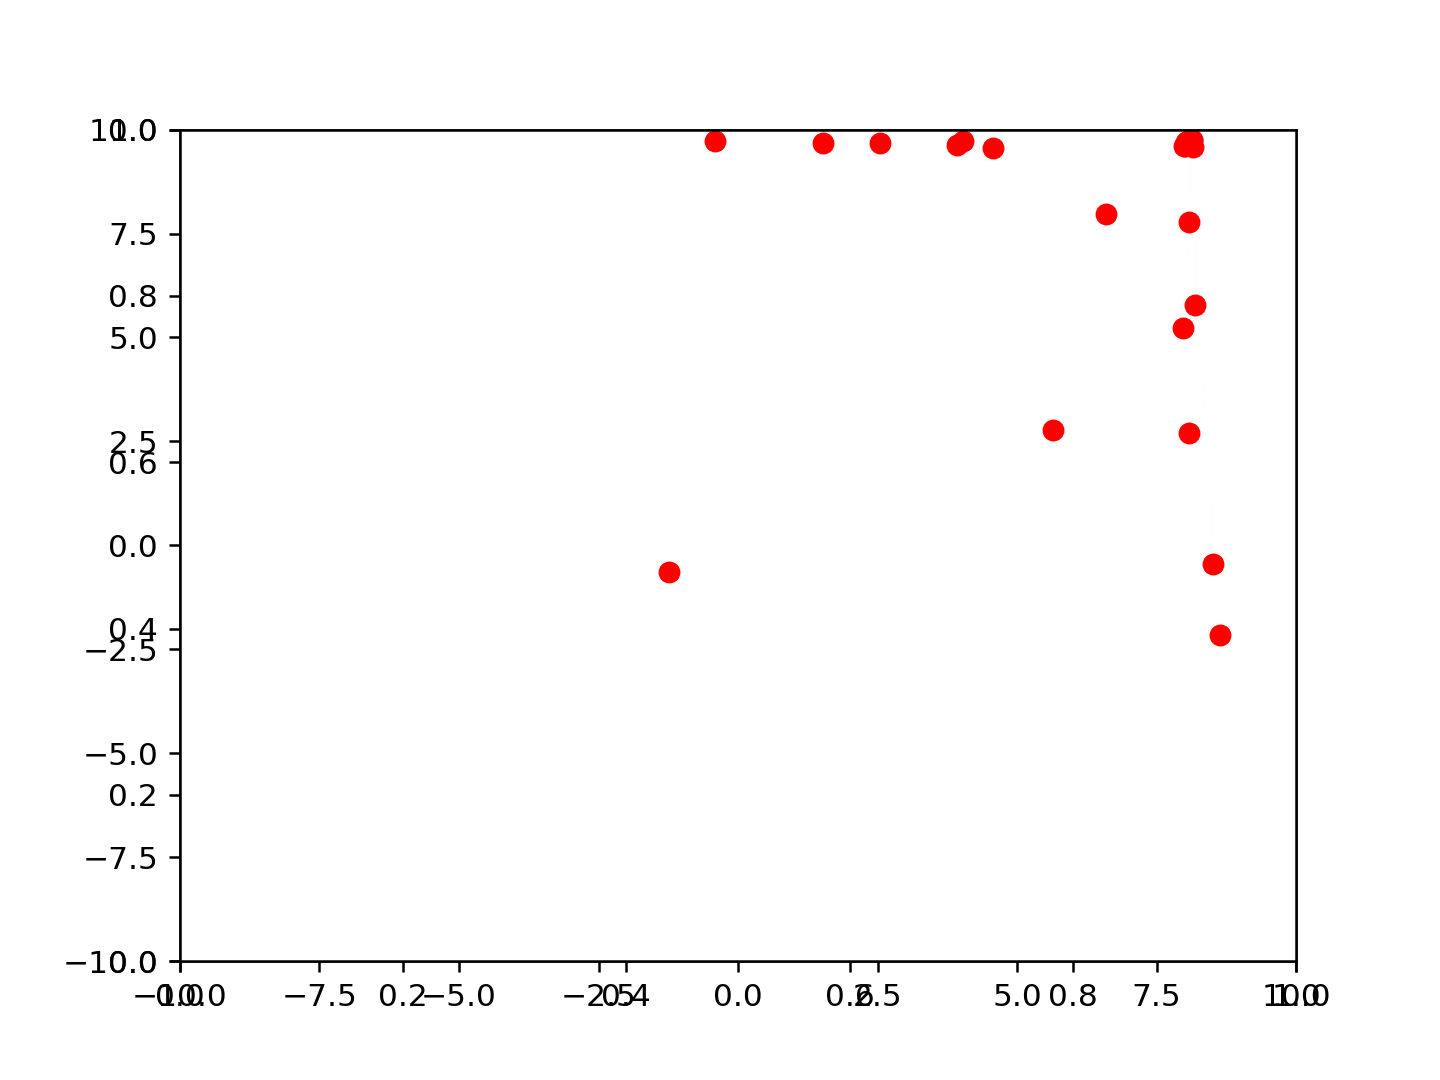

In [229]:
w = 0.005
c1 = 0.8
c2 = 1.5
n = 60
mp.dps=20
p = particle((0,0),(0,0))
globBestFit,globBestPos = p.fit_best,p.pos_best
#make particles
particles = []
for _ in range(n):
    x,y,v1,v2 = [np.random.choice([-1,1])*np.random.rand()*10 for _ in range(4)]
    particles.append(particle((x,y),(v1,v2)))

iterx=[]
itery=[]
for i in range(20):
    for p in particles:
        p.move()
    if(i%1==0):
        iterx.append(np.array([p.pos[0] for p in particles]))
        itery.append(np.array([p.pos[1] for p in particles]))
        print(f'on iteration {i} best is:{globBestFit},{globBestPos}')
        
print(globBestFit,globBestPos)
lijst1 = iterx
lijst2 = itery

fig, ax = plt.subplots()
ax = plt.axes(xlim=(-10,10), ylim=(-10, 10))
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro--', lw=0.001)

def init():
    ax.set_xlim(-1,1)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata = lijst1[frame].tolist()
    ydata = lijst2[frame].tolist()
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=len(lijst1), interval=1000, blit=True)# init_func=init,
plt.show()
ani.save('swarm_ani.gif', writer='pillow')


#### i attached a gif file that shows the movment of particles in this 20 iterations

#### now we define particles for function g

In [232]:
class particle:
    pos = None
    v = None
    fitness = None
    pos_best = None
    fit_best = None
    def __init__(self,pos,v):
        self.pos = np.array(pos)
        self.v = np.array(v)
        self.fitness = self.fit()
        self.fit_best = self.fitness
        self.pos_best = self.pos
        
    def fit(self):
        x,y = self.pos
        try:
            temp = mp.sin(y/x)/(1+mp.cos(y/x))
        except:
            x+=0.1
            temp = mp.sin(y/x)/(1+mp.cos(y/x))
        return x*mp.sin(mp.pi*mp.cos(x)*mp.tan(y))*temp
    
    def move(self):
        global globBestFit,globBestPos

        inersi = w*(self.v%100)
        personal_best = c1*np.random.rand()*(self.pos_best-self.pos)
        global_best = c2*np.random.rand()*(globBestPos-self.pos)
        
        v2 = inersi+personal_best+global_best
        self.pos = self.pos+v2
        self.v = v2
        
        x,y = self.pos
        if(x<-100):x=100-abs(-100-x)%200
        if(x>100):x=-100+abs(100-x)%200
        if(y<-100):y=100-abs(-100-y)%200
        if(y>100):y=-100+abs(100-y)%200
        self.pos = np.array([x,y])
        
        self.fitness = self.fit()
        if(self.fitness<self.fit_best):
            self.fit_best = self.fitness
            self.pos_best = self.pos
        
        if(self.fitness<globBestFit):
            globBestFit = self.fitness
            globBestPos = self.pos
        
        return

#### we can't use fast convergence as we use in function f so the parameters change like this:

In [182]:
w = 0.25
c1 = 1
c2 = 1.5
n = 200
mp.dps=10
p = particle((1,1),(0,0))
globBestFit,globBestPos = p.fit_best,p.pos_best
#make particles
particles = []
for _ in range(n):
    x,y,v1,v2 = [np.random.choice([-1,1])*np.random.rand()*10 for _ in range(4)]
    particles.append(particle((x,y),(v1,v2)))


for i in range(4000):
    for p in particles:
        p.move()
    if(i%150==0):print(f'on iteration {i} best is:{globBestFit},{globBestPos}')
        
print(globBestFit,globBestPos)

on iteration 0 best is:-1547.801994,[27.61301093 87.57987064]
on iteration 150 best is:-386286.5956,[ 19.41682433 -60.9989053 ]
on iteration 300 best is:-386286.5956,[ 19.41682433 -60.9989053 ]
on iteration 450 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 600 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 750 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 900 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1050 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1200 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1350 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1500 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1650 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1800 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 1950 best is:-990102.2624,[ 19.80901945 -62.23112237]
on iteration 2100 best is:-990102.2624,[ 19.80901945 -62.23112237]
on ite

#### now since Shayan said that the result is diffrent in 0.01 so we limit our search range

In [187]:
#x range:19.7 to 19.9
#y range:-62.1 to -62.3
class particle:
    pos = None
    v = None
    fitness = None
    pos_best = None
    fit_best = None
    def __init__(self,pos,v):
        self.pos = np.array(pos)
        self.v = np.array(v)
        self.fitness = self.fit()
        self.fit_best = self.fitness
        self.pos_best = self.pos
        
    def fit(self):
        x,y = self.pos
        try:
            temp = mp.sin(y/x)/(1+mp.cos(y/x))
        except:
            x+=0.1
            temp = mp.sin(y/x)/(1+mp.cos(y/x))
        return x*mp.sin(mp.pi*mp.cos(x)*mp.tan(y))*temp
    
    def move(self):
        global globBestFit,globBestPos

        inersi = w*self.v
        personal_best = c1*np.random.rand()*(self.pos_best-self.pos)
        global_best = c2*np.random.rand()*(globBestPos-self.pos)
        
        v2 = inersi+personal_best+global_best
        self.pos = self.pos+v2
        self.v = v2
        
        x,y = self.pos
        if(x<19.7):x=19.9-abs(19.7-x)%0.2
        if(x>19.9):x=19.7+abs(19.9-x)%0.2
        if(y<-62.3):y=-62.1-abs(-62.3-y)%0.2
        if(y>-62.1):y=-62.3+abs(-62.1-y)%0.2
        if(x<19.7 or x>19.9):
            print('this should never print x')
        if(y<-62.3 or y>-62.1):
            print('this should never print y')
        self.pos = np.array([x,y])
        
        self.fitness = self.fit()
        if(self.fitness<self.fit_best):
            self.fit_best = self.fitness
            self.pos_best = self.pos
        
        if(self.fitness<globBestFit):
            globBestFit = self.fitness
            globBestPos = self.pos
        
        return

In [190]:
#x range:19.7 to 19.9
#y range:-62.1 to -62.3
w = 0.25
c1 = 1
c2 = 1.5
n = 200
mp.dps=10
p = particle((1,1),(0,0))
globBestFit,globBestPos = p.fit_best,p.pos_best
#make particles
particles = []
for _ in range(n):
    x,y,v1,v2 = [np.random.choice([-1,1])*np.random.rand()*10 for _ in range(4)]
    particles.append(particle((x,y),(v1,v2)))


for i in range(3000):
    for p in particles:
        p.move()
    if(i%400==0):print(f'on iteration {i} best is:{globBestFit},{globBestPos}')
        
print(globBestFit,globBestPos)

on iteration 0 best is:-2162334.698,[ 19.77376355 -62.12074779]
on iteration 400 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 800 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 1200 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 1600 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 2000 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 2400 best is:-12700284.52,[ 19.77887996 -62.13709157]
on iteration 2800 best is:-12700284.52,[ 19.77887996 -62.13709157]
-12700284.52 [ 19.77887996 -62.13709157]
